<a href="https://colab.research.google.com/github/ntran247/NYU2023SummerML1/blob/main/CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np

### Download the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Scale pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# make labels one-hot representation
train_labels_one_hot = tf.one_hot(train_labels, 10)[:, 0, :]
test_labels_one_hot = tf.one_hot(test_labels, 10)[:, 0, :]

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

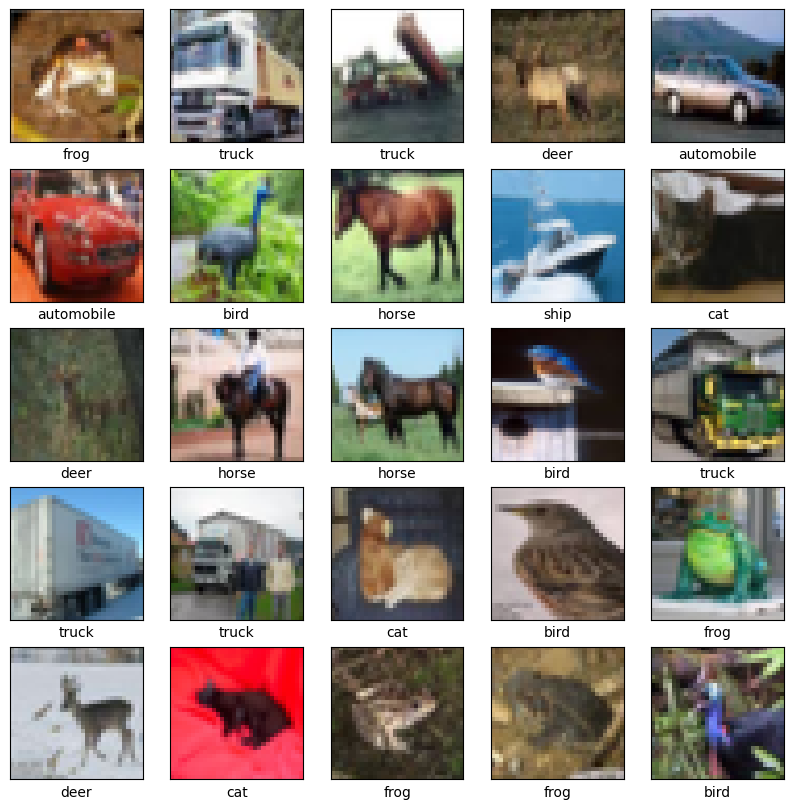

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build Model

In [ ]:
# TODO
# Build your own model
print(train_images.shape)
print(train_labels_one_hot)

(50000, 32, 32, 3)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(50000, 10), dtype=float32)


Convolution Model

In [ ]:
model1 = models.Sequential([

layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

layers.MaxPooling2D(strides=(2, 2)),

layers.Conv2D(64, (3, 3), activation='relu'),

layers.MaxPooling2D(strides=(2, 2)),
layers.Flatten(),

layers.Dense(1024, activation='relu'),
layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(train_images, train_labels_one_hot, batch_size=128, epochs=10, validation_data=(test_images, test_labels_one_hot), shuffle=True)

# LOG

# # ORIGINAL
# 5 Epochs - 962 seconds - 56.08% val accuracy

# > Halving the neurons in every Conv2D made it faster
# 5 Epochs - 449 seconds - 48.92% val accuracy

# > Deleted 2 of 4 Conv2D & doubled filters in remaining layers
# 5 Epochs - 345 seconds - 42.85% val accuracy

# > Halving the neurons in Conv2Ds + doubling neurons in second Dense layer
# 5 Epochs - 189 seconds - 37.96% val accuracy

# > Added back 2 Conv2D & halved neurons in them, and having 128 neurons in both Dense layers
# 5 Epochs - 269 seconds - 43.77% val accuracy

# > Replaced GlobalAveragePooling2D with Flatten, added another Conv2D layer
# 5 Epochs - 353 seconds - 57.79% val accuracy

# > Added one more Conv2D layer
# 5 Epochs - 368 seconds - 56.15% val accuracy

# > Added MaxPooling2D before the Flatten, doubled one of the Conv2D's neurons, doubled one of the Dense layer's neurons
# 5 Epochs - 362 seconds - 58.39% val accuracy

# > Combined two Conv2D layers
# 5 Epochs - 320 seconds - 63.12% val accuracy

# > Combined the Dense layers into one with 512 neurons
# 5 Epochs - 329 seconds - 64.7% val accuracy

# > Combined two of the Conv2D layers and made it 64 neurons
# 5 Epochs - 391 seconds - 68.18% val accuracy - val accuracy went down from Epoch 4 -> 5

# > Combined the other two Conv2D layers and made it 32 neurons
# 5 Epochs - 398 seconds - 68.93% val accuracy

# > Doubled epochs to 10
# 10 Epochs - 819 seconds - 71.63% val accuracy - val accuracy went down from Epoch 8 -> 9, maxed at 10

# > Doubled Dense layer from 512 -> 1024 neurons
#

Epoch 1/10
391/391 [==============================] - 6s 10ms/step - loss: 1.4325 - accuracy: 0.4851 - val_loss: 1.2355 - val_accuracy: 0.5636
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0719 - accuracy: 0.6235 - val_loss: 1.0515 - val_accuracy: 0.6277
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9108 - accuracy: 0.6829 - val_loss: 0.9374 - val_accuracy: 0.6747
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.7909 - accuracy: 0.7246 - val_loss: 0.8699 - val_accuracy: 0.6977
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.6809 - accuracy: 0.7638 - val_loss: 0.8671 - val_accuracy: 0.7043
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.5728 - accuracy: 0.8028 - val_loss: 0.8481 - val_accuracy: 0.7135
Epoch 7/10
391/391 [==============================] - 3s 6ms/step - loss: 0.4565 - accuracy: 0.8438 - val_loss: 0.8944 - val_accuracy: 0.7113
Epoch

313/313 [==============================] - 1s 2ms/step
Test Accuracy:  72.65 %


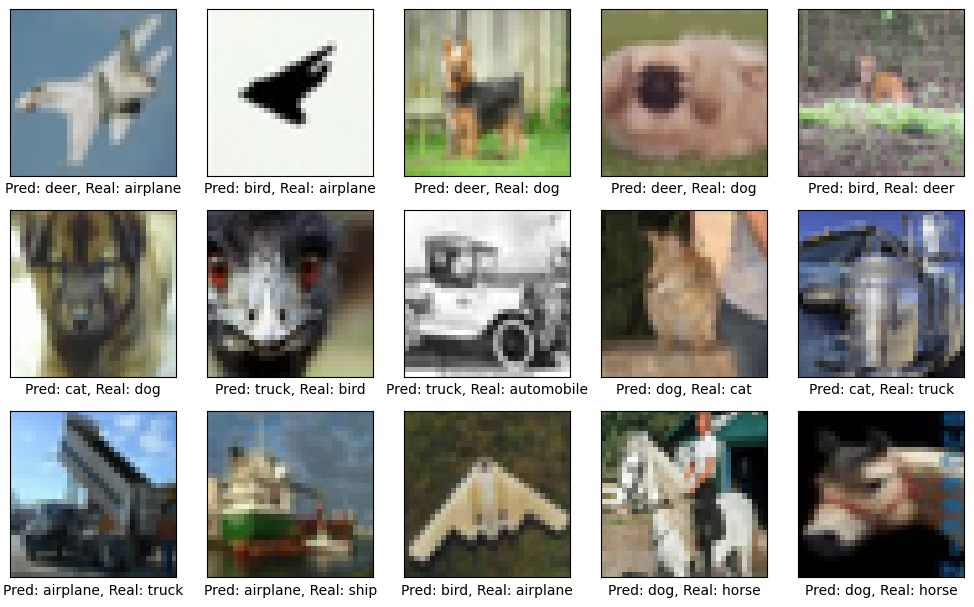

In [ ]:
y_test_argmax = np.ones(test_labels_one_hot.shape[0])

for i in range(len(y_test_argmax)):
  y_test_argmax[i] = np.argmax(test_labels_one_hot[i])

y_hat = np.argmax(model1.predict(test_images), axis = -1)
test_acc = np.mean(y_hat == y_test_argmax)

print("Test Accuracy: ", test_acc * 100, "%")

correct_indices = np.nonzero(y_hat == y_test_argmax)[0]
incorrect_indices = np.nonzero(y_hat != y_test_argmax)[0]

fig = plt.figure()
fig.set_size_inches(10, 10)

for i, index in enumerate(incorrect_indices[:15]):
  plt.subplot(5, 5, i + 1)
  plt.imshow(test_images[index].reshape((32, 32, 3)))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"Pred: {class_names[int(y_hat[index])]}, Real: {class_names[int(y_test_argmax[index])]}")

plt.tight_layout()

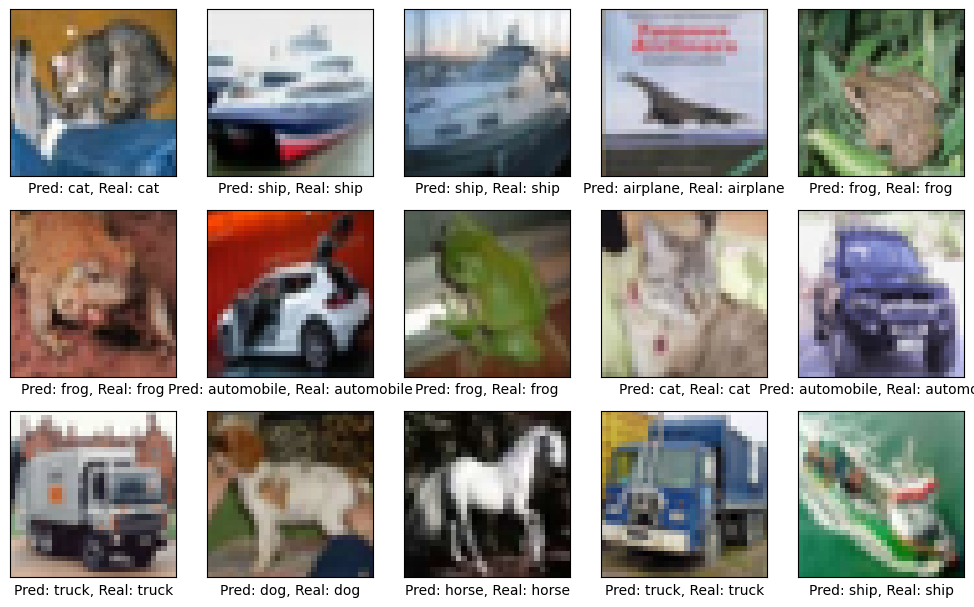

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)

for i, index in enumerate(correct_indices[:15]):
  plt.subplot(5, 5, i + 1)
  plt.imshow(test_images[index].reshape((32, 32, 3)))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"Pred: {class_names[int(y_hat[index])]}, Real: {class_names[int(y_test_argmax[index])]}")

plt.tight_layout()